In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import ipaddress
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [3]:
data = pd.read_csv('rba-dataset.csv')

In [4]:
import pandas as pd

# Specify the chunk size
chunk_size = 1000000  # Adjust based on your memory limits

# Initialize an empty list to store the data
chunks = []

# Read the CSV file in chunks
for chunk in pd.read_csv('rba-dataset.csv', chunksize=chunk_size):
    chunks.append(chunk)
    print("SSs")

# Concatenate all chunks into a single DataFrame
data = pd.concat(chunks, axis=0)

SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs


In [5]:
data.head()

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,0,2020-02-03 12:43:30.772,-4324475583306591935,NaN,10.0.65.171,NO,-,-,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False
1,1,2020-02-03 12:43:43.549,-4324475583306591935,NaN,194.87.207.6,AU,-,-,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False
2,2,2020-02-03 12:43:55.873,-3284137479262433373,NaN,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
3,3,2020-02-03 12:43:56.180,-4324475583306591935,NaN,170.39.78.152,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False
4,4,2020-02-03 12:43:59.396,-4618854071942621186,NaN,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False


In [6]:
len(data)


31269264

In [7]:
data.dtypes

index                         int64
Login Timestamp              object
User ID                       int64
Round-Trip Time [ms]        float64
IP Address                   object
Country                      object
Region                       object
City                         object
ASN                           int64
User Agent String            object
Browser Name and Version     object
OS Name and Version          object
Device Type                  object
Login Successful               bool
Is Attack IP                   bool
Is Account Takeover            bool
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31269264 entries, 0 to 31269263
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   index                     int64  
 1   Login Timestamp           object 
 2   User ID                   int64  
 3   Round-Trip Time [ms]      float64
 4   IP Address                object 
 5   Country                   object 
 6   Region                    object 
 7   City                      object 
 8   ASN                       int64  
 9   User Agent String         object 
 10  Browser Name and Version  object 
 11  OS Name and Version       object 
 12  Device Type               object 
 13  Login Successful          bool   
 14  Is Attack IP              bool   
 15  Is Account Takeover       bool   
dtypes: bool(3), float64(1), int64(3), object(9)
memory usage: 3.1+ GB


In [9]:
data.describe

<bound method NDFrame.describe of              index          Login Timestamp              User ID  \
0                0  2020-02-03 12:43:30.772 -4324475583306591935   
1                1  2020-02-03 12:43:43.549 -4324475583306591935   
2                2  2020-02-03 12:43:55.873 -3284137479262433373   
3                3  2020-02-03 12:43:56.180 -4324475583306591935   
4                4  2020-02-03 12:43:59.396 -4618854071942621186   
...            ...                      ...                  ...   
31269259  31269259  2021-02-28 23:59:47.766 -4324475583306591935   
31269260  31269260  2021-02-28 23:59:49.956 -4324475583306591935   
31269261  31269261  2021-02-28 23:59:54.233 -4324475583306591935   
31269262  31269262  2021-02-28 23:59:56.343 -4324475583306591935   
31269263  31269263  2021-02-28 23:59:58.756 -3863191272176615105   

          Round-Trip Time [ms]     IP Address Country          Region  \
0                          NaN    10.0.65.171      NO               -   
1  

In [10]:
data.isna().sum()

index                              0
Login Timestamp                    0
User ID                            0
Round-Trip Time [ms]        29993329
IP Address                         0
Country                            0
Region                         47409
City                            8590
ASN                                0
User Agent String                  0
Browser Name and Version           0
OS Name and Version                0
Device Type                     1526
Login Successful                   0
Is Attack IP                       0
Is Account Takeover                0
dtype: int64

In [11]:
data['Login Hour'] = pd.to_datetime(data['Login Timestamp']).dt.hour

In [12]:
data.head()

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Login Hour
0,0,2020-02-03 12:43:30.772,-4324475583306591935,NaN,10.0.65.171,NO,-,-,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False,12
1,1,2020-02-03 12:43:43.549,-4324475583306591935,NaN,194.87.207.6,AU,-,-,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False,12
2,2,2020-02-03 12:43:55.873,-3284137479262433373,NaN,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False,12
3,3,2020-02-03 12:43:56.180,-4324475583306591935,NaN,170.39.78.152,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False,12
4,4,2020-02-03 12:43:59.396,-4618854071942621186,NaN,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False,12


In [13]:
data['Is Account Takeover'] = data['Is Account Takeover'].astype(np.uint8)
data['Is Attack IP'] = data['Is Attack IP'].astype(np.uint8)
data['Login Successful'] = data['Login Successful'].astype(np.uint8)

In [14]:
data = data.drop(columns=["Round-Trip Time [ms]", 'Region', 'City', 'Login Timestamp', 'index'])

In [15]:
data.head()

,User ID,IP Address,Country,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Login Hour
0,-4324475583306591935,10.0.65.171,NO,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,0,0,0,12
1,-4324475583306591935,194.87.207.6,AU,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,0,0,0,12
2,-3284137479262433373,81.167.144.58,NO,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,1,0,0,12
3,-4324475583306591935,170.39.78.152,US,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,0,0,0,12
4,-4618854071942621186,10.0.0.47,US,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,0,1,0,12


In [16]:
data['User Agent String'], _ = pd.factorize(data['User Agent String'])
data['Browser Name and Version'], _ = pd.factorize(data['Browser Name and Version'])
data['OS Name and Version'], _ = pd.factorize(data['OS Name and Version'])

In [17]:
def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))

data['IP Address'] = data['IP Address'].apply(ip_to_int)

In [18]:
data.head(20)

,User ID,IP Address,Country,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Login Hour
0,-4324475583306591935,167788971,NO,29695,0,0,0,mobile,0,0,0,12
1,-4324475583306591935,3260534534,AU,60117,1,1,1,mobile,0,0,0,12
2,-3284137479262433373,1369935930,NO,29695,2,2,2,mobile,1,0,0,12
3,-4324475583306591935,2854702744,US,393398,3,3,1,mobile,0,0,0,12
4,-4618854071942621186,167772207,US,398986,4,3,3,mobile,0,1,0,12
5,-4324475583306591935,3521936254,US,393398,5,3,1,mobile,0,1,0,12
6,7246533443898239661,1355474134,NO,15659,6,4,4,desktop,1,0,0,12
7,-3243978724802435038,2854702769,US,393398,7,5,5,mobile,0,0,0,12
8,8076000552587369902,167787988,NO,29695,8,6,6,mobile,0,0,0,12
9,-3065936140549856249,1558015394,NO,29695,9,7,7,desktop,1,0,0,12


In [19]:
account_takeover_rows = data[data['Is Account Takeover'] == 1]

# Display or further process the filtered rows
account_takeover_rows

,User ID,IP Address,Country,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Login Hour
82873,5519106287451092780,168034722,IT,503109,2611,36,7,desktop,1,0,1,13
82947,-7654599524478640403,168034722,IT,503109,2611,36,7,desktop,1,0,1,13
100085,-6380256063165146454,528683032,RO,56851,10118,180,10,desktop,1,1,1,17
202905,4130074439166519892,3114960900,IT,206801,36,24,18,mobile,1,0,1,5
273968,-136955930917892295,167793933,NO,197475,11,9,7,desktop,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20623917,-249028206650900290,1541160943,RO,197357,324772,3292,0,mobile,1,1,1,8
20700950,-1639909578889655226,95726278,RO,206801,174628,2316,7,desktop,1,1,1,7
21266387,-4655135911852100550,168018399,BR,500106,2,2,2,mobile,1,0,1,20
21497310,-1999335758853878070,3000358111,RO,31028,174628,2316,7,desktop,1,1,1,18


In [20]:
categorical_cols = ['Country', 'Device Type']
numeric_cols = ['ASN', 'Login Hour', 'IP Address', 'User Agent String', 'Browser Name and Version', 'OS Name and Version']

In [21]:
"""percentage wise calculations
"""
percentage1=data['Is Attack IP'].value_counts(normalize=True)*100
percentage2=data['Is Account Takeover'].value_counts(normalize=True)*100
percentage3=data['Login Successful'].value_counts(normalize=True)*100

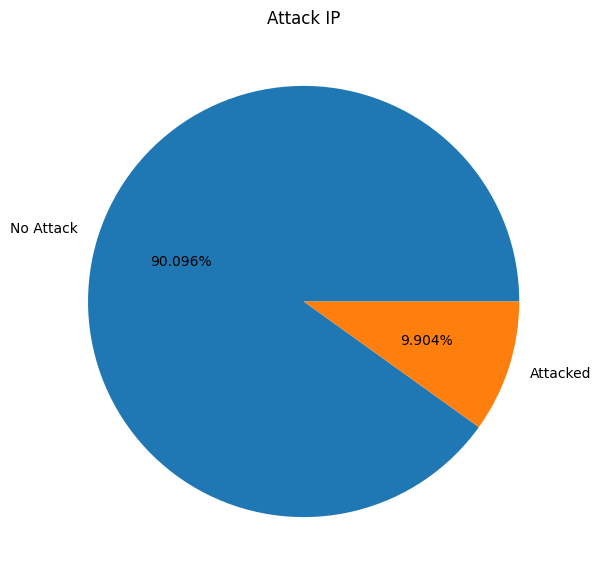

In [22]:
classlabels=["No Attack","Attacked"]
plt.figure(figsize=(12,7))
plt.pie(percentage1,labels=classlabels,autopct='%1.3f%%')
plt.title("Attack IP")
plt.show()

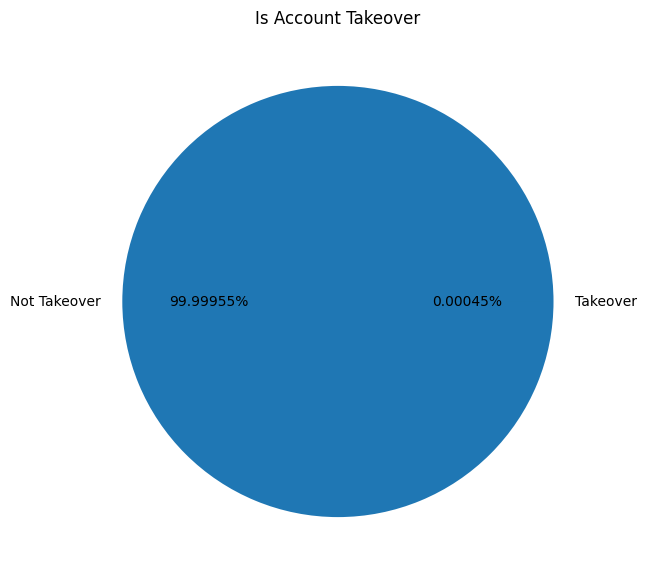

In [23]:
classlabels=["Not Takeover", "Takeover"]
plt.figure(figsize=(12,7))
plt.pie(percentage2,labels=classlabels,autopct='%1.5f%%')
plt.title("Is Account Takeover")
plt.show()

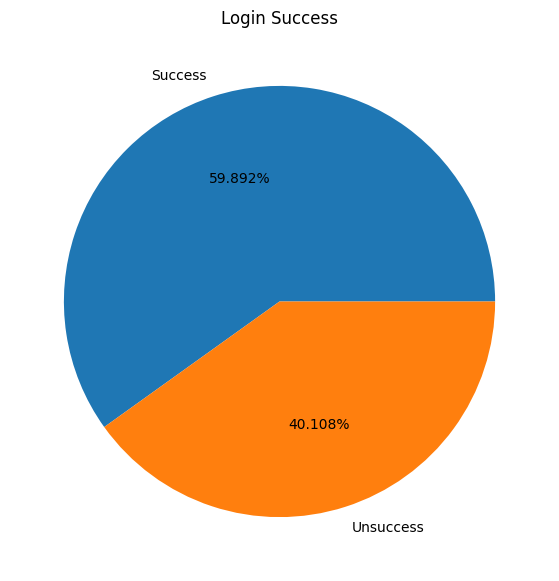

In [24]:
classlabels=["Success","Unsuccess"]
plt.figure(figsize=(12,7))
plt.pie(percentage3,labels=classlabels,autopct='%1.3f%%')
plt.title("Login Success")
plt.show()

In [25]:
# Splitting the dataset
features = data.drop(['Is Attack IP', 'Is Account Takeover'], axis=1)
labels = data['Is Account Takeover']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42,stratify=labels)

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Classifiers
classifiers = {
    'logistic_regression': LogisticRegression(max_iter=1000),
    'decision_tree': DecisionTreeClassifier(),
    'svm': SVC(probability=True),
    'random_forest': RandomForestClassifier(),
    'Adaboost' : AdaBoostClassifier(),
    'Extra' :  ExtraTreesClassifier(),
    'lgbm' : LGBMClassifier(),
    'XGB': XGBClassifier()
}

# A function to choose classifiers
def make_pipeline(classifier_key):
    if classifier_key in classifiers:
        clf = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', classifiers[classifier_key])
        ])
        return clf
    else:
        raise ValueError(f"Classifier {classifier_key} is not defined")

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

In [28]:
classifier_key = 'logistic_regression'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
lrpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

AUC Score: 0.867026585443994


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [30]:
Score = accuracy_score(y_test,lrpredictions)
Classification_Report = classification_report(y_test,lrpredictions)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

/Users/kaushalkento/Desktop/GroupProject./RealTimeProject/CaptchaRealTimeProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kaushalkento/Desktop/GroupProject./RealTimeProject/CaptchaRealTimeProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6253825
           1       0.00      0.00      0.00        28

    accuracy                           1.00   6253853
   macro avg       0.50      0.50      0.50   6253853
weighted avg       1.00      1.00      1.00   6253853



/Users/kaushalkento/Desktop/GroupProject./RealTimeProject/CaptchaRealTimeProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


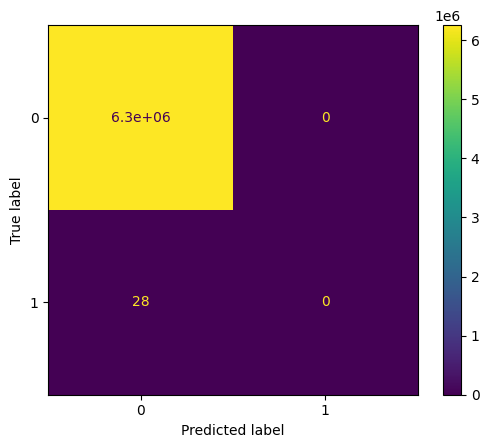

In [31]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

In [32]:
classifier_key = 'decision_tree'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
dtpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

AUC Score: 0.6249973444823197


In [33]:
Score = accuracy_score(y_test,dtpredictions)
Classification_Report = classification_report(y_test,dtpredictions)

print("Decision Tree")
print ("Accuracy Score value: {:.8f}".format(Score))
print (Classification_Report)

Decision Tree
Accuracy Score value: 0.99999344
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6253825
           1       0.22      0.18      0.20        28

    accuracy                           1.00   6253853
   macro avg       0.61      0.59      0.60   6253853
weighted avg       1.00      1.00      1.00   6253853



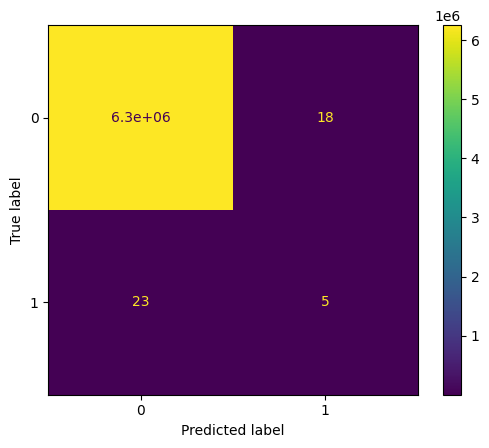

In [34]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

In [36]:
classifier_key = 'random_forest'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
predictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)
print(f"AUC Score: {auc_score}")

AUC Score: 0.8571237317047682


In [37]:
Score = accuracy_score(y_test,predictions)
Classification_Report = classification_report(y_test,predictions)

print("Random Forest")
print ("Accuracy Score value: {:.8f}".format(Score))
print (Classification_Report)

Random Forest
Accuracy Score value: 0.99999488
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6253825
           1       0.33      0.14      0.20        28

    accuracy                           1.00   6253853
   macro avg       0.67      0.57      0.60   6253853
weighted avg       1.00      1.00      1.00   6253853



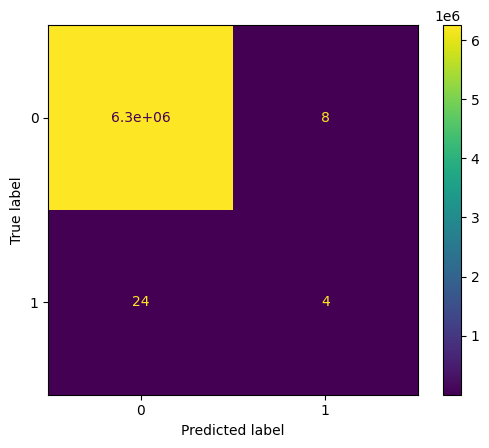

In [38]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
classifier_key = 'Adaboost'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
abpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

AUC Score: 0.978833605262151


In [41]:
Score = accuracy_score(y_test,abpredictions)
Classification_Report = classification_report(y_test,abpredictions)

print("Ada Boost")
print ("Accuracy Score value: {:.8f}".format(Score))
print (Classification_Report)

/Users/kaushalkento/Desktop/GroupProject./RealTimeProject/CaptchaRealTimeProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kaushalkento/Desktop/GroupProject./RealTimeProject/CaptchaRealTimeProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ada Boost
Accuracy Score value: 0.99999552
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6253825
           1       0.00      0.00      0.00        28

    accuracy                           1.00   6253853
   macro avg       0.50      0.50      0.50   6253853
weighted avg       1.00      1.00      1.00   6253853



/Users/kaushalkento/Desktop/GroupProject./RealTimeProject/CaptchaRealTimeProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


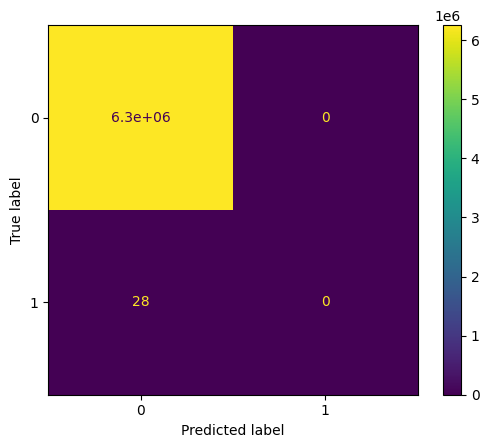

In [42]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

In [43]:
classifier_key = 'lgbm'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
lgbmpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

/Users/kaushalkento/Desktop/GroupProject./RealTimeProject/CaptchaRealTimeProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 113, number of negative: 25015298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 25015411, number of used features: 199
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000005 -> initscore=-12.307610
[LightGBM] [Info] Start training from score -12.307610


/Users/kaushalkento/Desktop/GroupProject./RealTimeProject/CaptchaRealTimeProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kaushalkento/Desktop/GroupProject./RealTimeProject/CaptchaRealTimeProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AUC Score: 0.49565553881024815


In [44]:
Score = accuracy_score(y_test,lgbmpredictions)
Classification_Report = classification_report(y_test,lgbmpredictions)

print("LGBM")
print ("Accuracy Score value: {:.8f}".format(Score))
print (Classification_Report)

LGBM
Accuracy Score value: 0.99997729
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6253825
           1       0.00      0.00      0.00        28

    accuracy                           1.00   6253853
   macro avg       0.50      0.50      0.50   6253853
weighted avg       1.00      1.00      1.00   6253853



/Users/kaushalkento/Desktop/GroupProject./RealTimeProject/CaptchaRealTimeProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


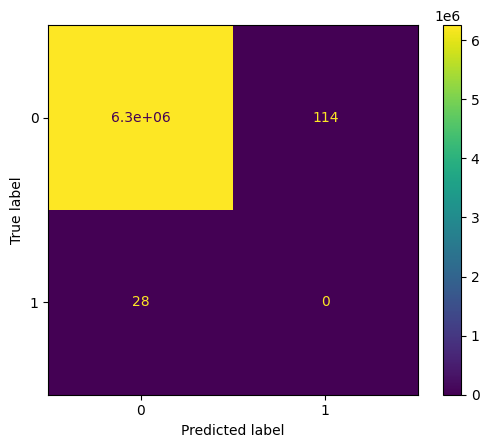

In [45]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

In [46]:
classifier_key = 'XGB'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
xgbpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

AUC Score: 0.9847150486759245


In [47]:
Score = accuracy_score(y_test,xgbpredictions)
Classification_Report = classification_report(y_test,xgbpredictions)

print("LGBM")
print ("Accuracy Score value: {:.8f}".format(Score))
print (Classification_Report)

LGBM
Accuracy Score value: 0.99999536
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6253825
           1       0.33      0.04      0.06        28

    accuracy                           1.00   6253853
   macro avg       0.67      0.52      0.53   6253853
weighted avg       1.00      1.00      1.00   6253853



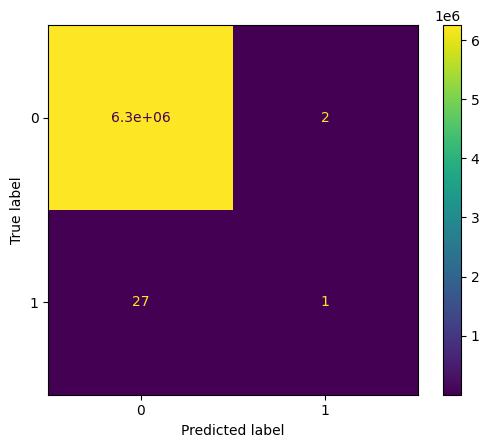

In [48]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()